

# Exercici 1

Crea almenys dos models de regressió diferents per intentar predir el millor possible el preu de les vivendes (MEDV) de l'arxiu adjunt.

In [1]:
import pandas as pd 

In [2]:
df = pd.read_csv('housing data.csv', names=['CRIM','ZN','INDUS','CHAS', 'NOX','RM','AGE','DIS','RAD','TAX','PTRADIO','B','LSTAT','MEDV'], header=None)
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRADIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0


<Figure size 432x288 with 0 Axes>

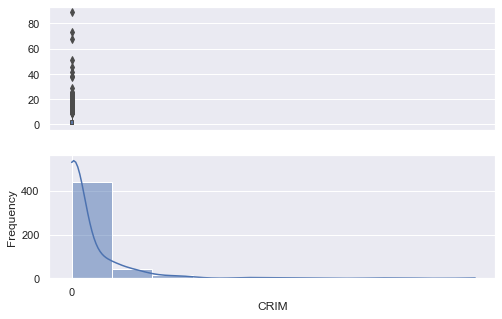

<Figure size 576x360 with 0 Axes>

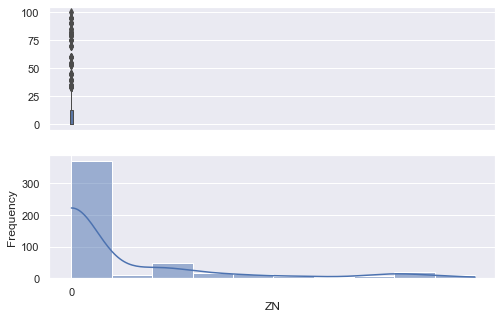

<Figure size 576x360 with 0 Axes>

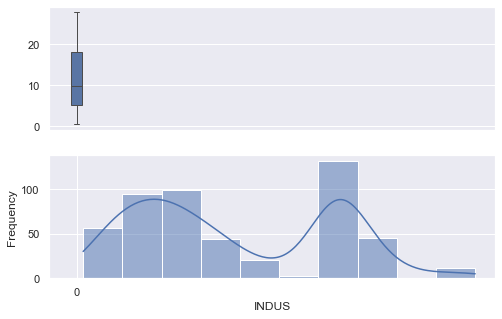

<Figure size 576x360 with 0 Axes>

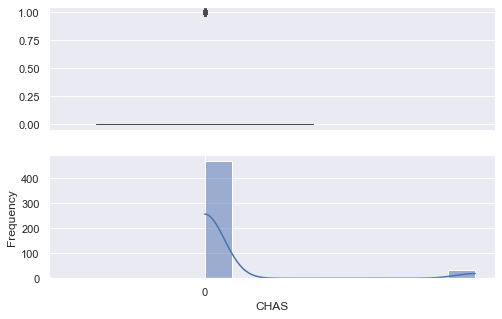

<Figure size 576x360 with 0 Axes>

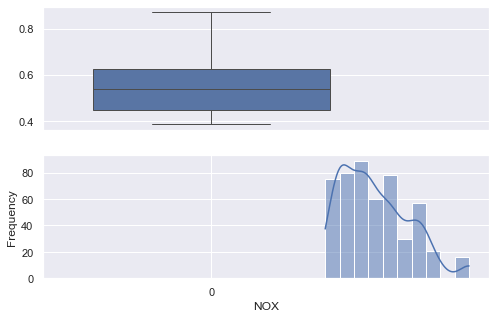

<Figure size 576x360 with 0 Axes>

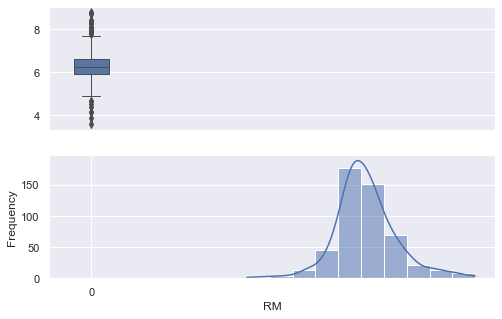

<Figure size 576x360 with 0 Axes>

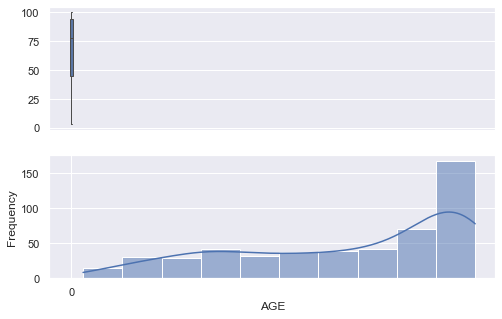

<Figure size 576x360 with 0 Axes>

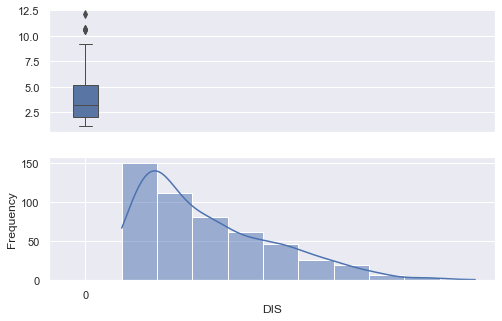

<Figure size 576x360 with 0 Axes>

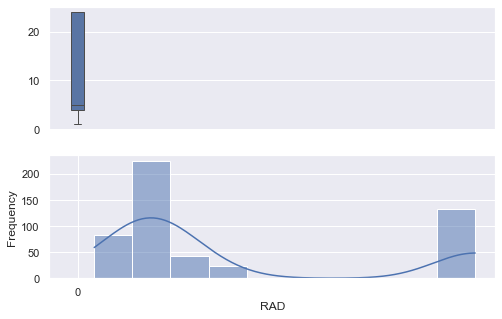

<Figure size 576x360 with 0 Axes>

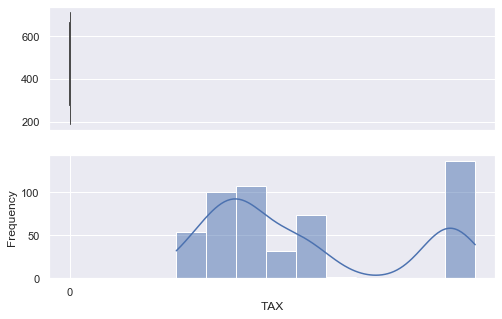

<Figure size 576x360 with 0 Axes>

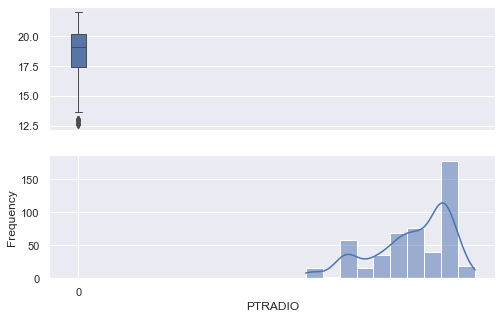

<Figure size 576x360 with 0 Axes>

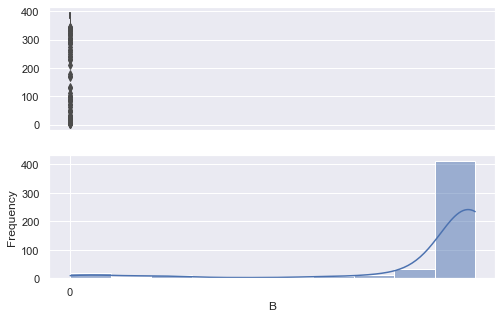

<Figure size 576x360 with 0 Axes>

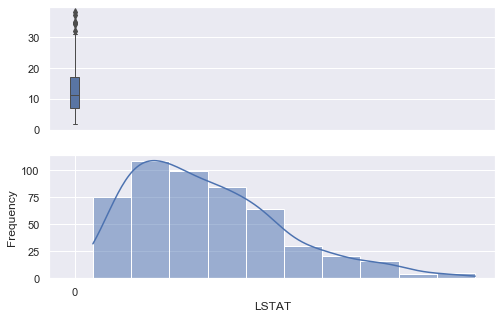

<Figure size 576x360 with 0 Axes>

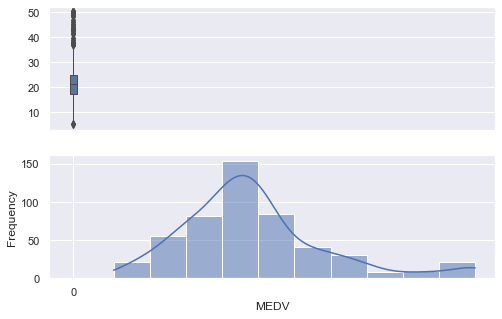

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")
for i in df.columns:
    plt.figure()
    plt.tight_layout()
    sns.set(rc={"figure.figsize":(8, 5)})
    f, (ax_box, ax_hist) = plt.subplots(2, sharex=True)
    plt.gca().set(xlabel= i,ylabel='Frequency')
    sns.boxplot(df[i],  ax=ax_box , linewidth= 1.0)
    sns.histplot(df[i], ax=ax_hist , bins = 10,kde=True)

Analitzo si les variables tenen una distribució normal o tenen outliers per tal de determinar quin preprocessats utilitzo. En cas que tinguin distribució normal executaré MinMaxScaler i si tenen outç
usaré RobustScaler

In [4]:
from sklearn import preprocessing 

from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import MinMaxScaler

columnsNorm = ['INDUS','NOX','AGE','RAD','TAX']
scaler = preprocessing.MinMaxScaler().fit(df[columnsNorm])
df[columnsNorm] = scaler.transform(df[columnsNorm])

columnsRobust = ['CRIM','ZN','CHAS','RM','DIS','PTRADIO','B','LSTAT','MEDV']
scaler = preprocessing.RobustScaler().fit(df[columnsRobust])
df[columnsRobust] = scaler.transform(df[columnsRobust])

Faig el prepocessat a partir de l'ànalisi en l'exercici M502

# Creació train i test

In [5]:
df.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRADIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object')

Imprimeixo columnes per dividir x i y

In [6]:
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
train, test = train_test_split(df, test_size=0.33,random_state=42)

In [7]:
X_train= train [['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRADIO', 'B', 'LSTAT']]
X_test = test [['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRADIO', 'B', 'LSTAT']]
y_train = train ['MEDV']
y_test = test ['MEDV']
X=df [['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRADIO', 'B', 'LSTAT']]
Y= df ['MEDV']

#Dubte: em vas comentar que podia fer la divisió del X_train i del X_test "automàticament",  com ho faria?

# Regressió lineal

In [8]:
import numpy as np
from sklearn.linear_model import LinearRegression

In [9]:
model = LinearRegression()
model.fit(X_train,y_train)
r_sq_rl = model.score(X_test, y_test)


In [10]:
from sklearn.metrics import mean_squared_error
y_true = y_test
y_pred = model.predict (X_test)
mse_rl=mean_squared_error(y_true, y_pred)
print ('MSE=',mse_rl)

MSE= 0.3258462230102267


In [11]:
from sklearn.metrics import r2_score
r2_rl= r2_score(y_true, y_pred)
print('R2=', r2_rl)


R2= 0.7261570836552469


# Decision Tree

In [12]:
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(random_state=42)
regressor.fit(X_train,y_train)
r_sq_dt=regressor.score (X_test, y_test)

In [13]:
from sklearn.metrics import mean_squared_error
y_true = y_test
y_pred = regressor.predict (X_test)
mse_dt=mean_squared_error(y_true, y_pred)
print ('MSE=',mse_dt)

MSE= 0.2643385313962438


In [14]:
r2_dt=r2_score(y_true, y_pred)
print('R2=',r2_dt)


R2= 0.7778484781222564


# Random Forest

In [15]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators = 1000, random_state = 42)
rf.fit(X_train,y_train)
r_sq_rf=rf.score (X_test, y_test)

In [16]:
from sklearn.metrics import mean_squared_error
y_true = y_test
y_pred = rf.predict (X_test)
mse_rf=mean_squared_error(y_true, y_pred)
print ('MSE=',mse_rf)

MSE= 0.1590783844314794


In [17]:
r2_rf=r_sq_rf
print('R2=', r2_rf)

R2= 0.8663096711151356


# Exercici 2

Compara’ls en base al MSE i al R2.

In [18]:
df_compar= pd.DataFrame()
df_compar ['Mètodes']= 'MSE','R2'
df_compar['Regressió lineal']= mse_rl,r2_rl
df_compar['Decision Tree']= mse_dt,r2_dt
df_compar['Random Forest']=mse_rf,r2_rf
df_compar

,Mètodes,Regressió lineal,Decision Tree,Random Forest
0,MSE,0.325846,0.264339,0.159078
1,R2,0.726157,0.777848,0.866310


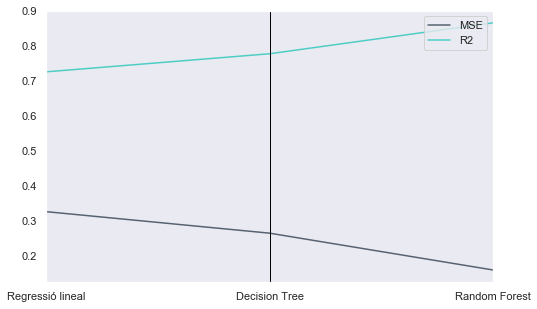

In [19]:
pd.plotting.parallel_coordinates(df_compar, 'Mètodes', color=('#556270', '#4ECDC4', '#C7F464'))


A la gràfica es veu clarament com Random Forest té el major nivell de R2 i el menor de MSE per la qual cosa el determinem com a millor model

# Exercici 3

Entrena’ls utilitzant els diferents paràmetres (paràmetres interns de cada model) que admeten per intentar millorar-ne la predicció.

Decision Tree

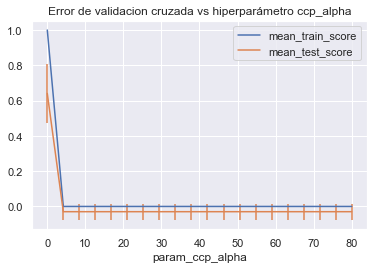

In [20]:
from sklearn.model_selection import GridSearchCV
import multiprocessing
from sklearn.model_selection import RepeatedKFold

# Pruning (const complexity pruning) por validación cruzada
# ------------------------------------------------------------------------------
# Valores de ccp_alpha evaluados
param_grid = {'ccp_alpha':np.linspace(0, 80, 20)}

# Búsqueda por validación cruzada
grid = GridSearchCV(
        # El árbol se crece al máximo posible para luego aplicar el pruning
        estimator = DecisionTreeRegressor(
                            max_depth         = None,
                            min_samples_split = 2,
                            min_samples_leaf  = 1,
                            random_state      = 123
                       ),
        param_grid = param_grid,
        cv         = 10,
        refit      = True,
        return_train_score = True
      )

grid.fit(X_train, y_train)
#grid.fit (X,Y)

fig, ax = plt.subplots(figsize=(6, 3.84))
scores = pd.DataFrame(grid.cv_results_)
scores.plot(x='param_ccp_alpha', y='mean_train_score', yerr='std_train_score', ax=ax)
scores.plot(x='param_ccp_alpha', y='mean_test_score', yerr='std_test_score', ax=ax)
ax.set_title("Error de validacion cruzada vs hiperparámetro ccp_alpha");



Profundidad del árbol: 24
Número de nodos terminales: 321


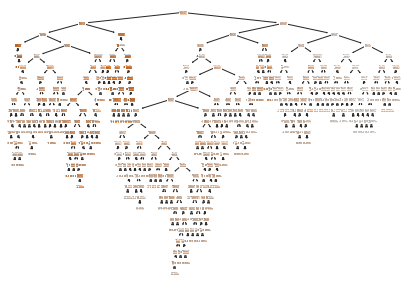

In [21]:
from sklearn.tree import plot_tree

# Estructura del árbol final
# ------------------------------------------------------------------------------
modelo_final = grid.best_estimator_
print(f"Profundidad del árbol: {modelo_final.get_depth()}")
print(f"Número de nodos terminales: {modelo_final.get_n_leaves()}")

fig, ax = plt.subplots(figsize=(7, 5))
plot = plot_tree(
            decision_tree = modelo_final,
            feature_names = df.drop(columns = "MEDV").columns,
            class_names   = 'MEDV',
            filled        = True,
            impurity      = False,
            ax            = ax
       )



In [22]:
grid.best_params_

{'ccp_alpha': 0.0}

In [23]:
modelo_final.fit(X_train,y_train)
r_sq_dt=modelo_final.score (X_test, y_test)

In [24]:
y_true = y_test
y_pred = modelo_final.predict (X_test)
mse_dt=mean_squared_error(y_true, y_pred)
print ('MSE=',mse_dt)

MSE= 0.3185192590811144


In [25]:
r2_dt=r2_score(y_true, y_pred)
print('R2=',r2_dt)

R2= 0.7323147035035455


#Dubtes: no acabo d'entendre perquè els valors em surten pitjor que en l'exercici anterior

Random Forest

In [26]:
from sklearn.model_selection import GridSearchCV
import multiprocessing
from sklearn.model_selection import RepeatedKFold



# Grid de hiperparámetros evaluados
# ==============================================================================
param_grid = {'bootstrap': [True, False],
 'max_depth': [10, 30,60, 100, None],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 1000, 2000]}

# Búsqueda por grid search con validación cruzada
# ==============================================================================
grid = GridSearchCV(
        estimator  = RandomForestRegressor(random_state = 123),
        param_grid = param_grid,
        scoring    = 'r2',
        n_jobs     = multiprocessing.cpu_count() - 1,
        cv         = RepeatedKFold(n_splits=5, n_repeats=3, random_state=123), 
        refit      = True,
        verbose    = 0,
        return_train_score = True
       )

grid.fit(X = X, y = Y)

# Resultados
# ==============================================================================
resultados = pd.DataFrame(grid.cv_results_)
resultados.filter(regex = '(param.*|mean_t|std_t)') \
    .drop(columns = 'params') \
    .sort_values('mean_test_score', ascending = False) \
    .head(4)

,param_bootstrap,param_max_depth,param_min_samples_leaf,param_min_samples_split,param_n_estimators,mean_test_score,std_test_score,mean_train_score,std_train_score
108,True,None,1,2,200,0.870804,0.037299,0.981617,0.002263
81,True,100,1,2,200,0.870804,0.037299,0.981617,0.002263
27,True,30,1,2,200,0.870804,0.037299,0.981617,0.002263
54,True,60,1,2,200,0.870804,0.037299,0.981617,0.002263


In [27]:
# Mejores hiperparámetros por validación cruzada
# ==============================================================================
print("----------------------------------------")
print("Mejores hiperparámetros encontrados (cv)")
print("----------------------------------------")
print(grid.best_params_, ":", grid.best_score_, grid.scoring)

----------------------------------------
Mejores hiperparámetros encontrados (cv)
----------------------------------------
{'bootstrap': True, 'max_depth': 30, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200} : 0.8708036402786525 r2


In [28]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor (bootstrap= True,
 max_depth=30,
 min_samples_leaf=1,
 min_samples_split=2,
 n_estimators= 200)

rf.fit(X_train,y_train)
r_sq_rf_grid=rf.score (X_test, y_test)
y_true = y_test
y_pred = rf.predict (X_test)
mse_dt=mean_squared_error(y_true, y_pred)

print ('MSE=',mse_dt)
print('R2=', r_sq_rf_grid)

MSE= 0.15862622981746513
R2= 0.8666896642818402


Utilitzant Gridsearch hem pogut millorar la predicció, disminuint el MSE i augmentant l'R2

# Exercici 4

Compara el seu rendiment emprant l’aproximació traint/test o emprant totes les dades (validació interna).

En l'exercici 3 ja he inclòs amb train/test


# Exercici 5

No facis servir la variable del nombre d'habitacions (RM) a l’hora de fer prediccions. (calcular MSE i R2)


In [29]:
X_train_srm = train [['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRADIO', 'B', 'LSTAT']]
X_test_srm=X_test = test [['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRADIO', 'B', 'LSTAT']]
rf.fit(X_train_srm,y_train)

RandomForestRegressor(max_depth=30, n_estimators=200)

LinearRegression

In [30]:
model = LinearRegression()
model.fit(X_train_srm,y_train)
r_sq_rl = model.score(X_test_srm, y_test)

In [31]:
y_true = y_test
y_pred = model.predict (X_test_srm)
mse_rl=mean_squared_error(y_true, y_pred)
print ('MSE=',mse_rl)

MSE= 0.3733111595146814


In [32]:
r2_rl= r2_score(y_true, y_pred)
print('R2=', r2_rl)

R2= 0.6862672960234582


Decision Tree

In [33]:
regressor = DecisionTreeRegressor(random_state=42)
regressor.fit(X_train_srm,y_train)
r_sq_dt=regressor.score (X_test_srm, y_test)

In [34]:
y_true = y_test
y_pred = regressor.predict (X_test_srm)
mse_dt=mean_squared_error(y_true, y_pred)
print ('MSE=',mse_dt)

MSE= 0.35124970232293135


In [35]:
r2_dt=r2_score(y_true, y_pred)
print('R2=',r2_dt)

R2= 0.7048078631670405


RandomForest

In [36]:
rf = RandomForestRegressor(bootstrap= True,
 max_depth=30,
 min_samples_leaf=1,
 min_samples_split=2,
 n_estimators= 200)
rf.fit(X_train_srm,y_train)
r_sq_rf=rf.score (X_test_srm, y_test)

In [37]:
y_true = y_test
y_pred = rf.predict (X_test_srm)
mse_rf=mean_squared_error(y_true, y_pred)
print ('MSE=',mse_rf)

MSE= 0.27295734715257114


In [38]:
r2_rf=r_sq_rf
print('R2=', r2_rf)

R2= 0.7706051790582169


En treure la variable de nombre d'habitacions les prediccions són força menys inexactes, per la qual cosa queda palès que el nombre d'habitacions és molt determinant per a predir el preu de les vivendes, cosa que per lògica ja podríem preveure.

#He tret informació de la pàgina https://www.cienciadedatos.net per si li vols fer una ullada a veure què et sembla. Merci